# Classification

Classification is one of fundamental tasks in the supervised machine learning. The goal is basically to train classifier model with the labelled dataset such that the model is able to categorize unseen data into predefined class. The classification algoritms create so-called mapping functions that relate the input spaces to output variables.

Remember that in the regression task, the model is trained to predict continuous target variable. Meanwhile, the model in classification task is trained to predict discrete values (i.e., label or class)

## Load dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

In [2]:
wine = load_wine(as_frame=True)

## Dataset description

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [4]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Visualize the data

In [5]:
# make dataframe and add target class to the wine data
df = pd.DataFrame(wine.data)
df['target'] = wine.target

<Axes: >

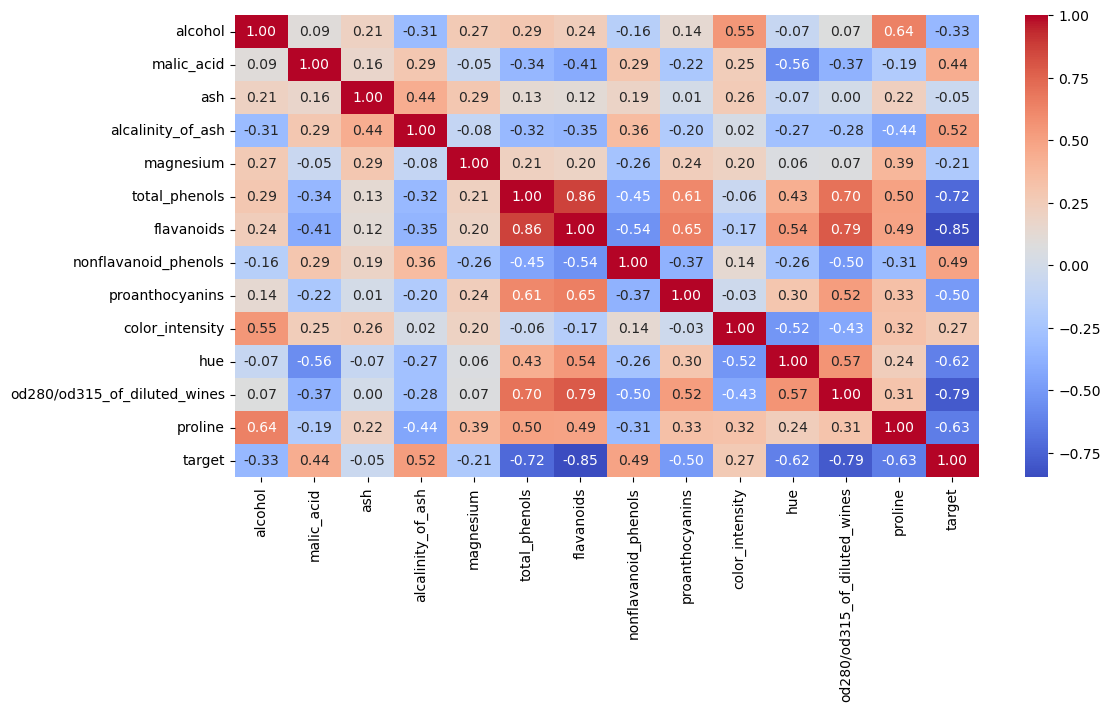

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

> It is noteworthy that before performing any classification task, make sure that the target class are **balance**.
>
> If you have any **imbalanced** class, you need to take additional step for **resampling** the train dataset.
>
> The following plot shows that the target classes have relatively imbalanced count. But let's try to use them and see how the models perform. 

<Axes: xlabel='target', ylabel='count'>

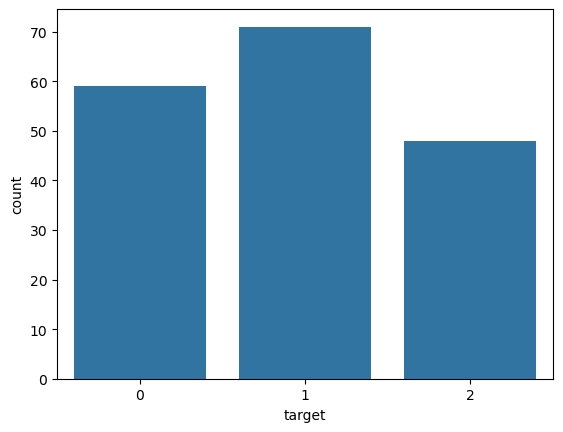

In [7]:
sns.countplot(data=df, x = 'target')

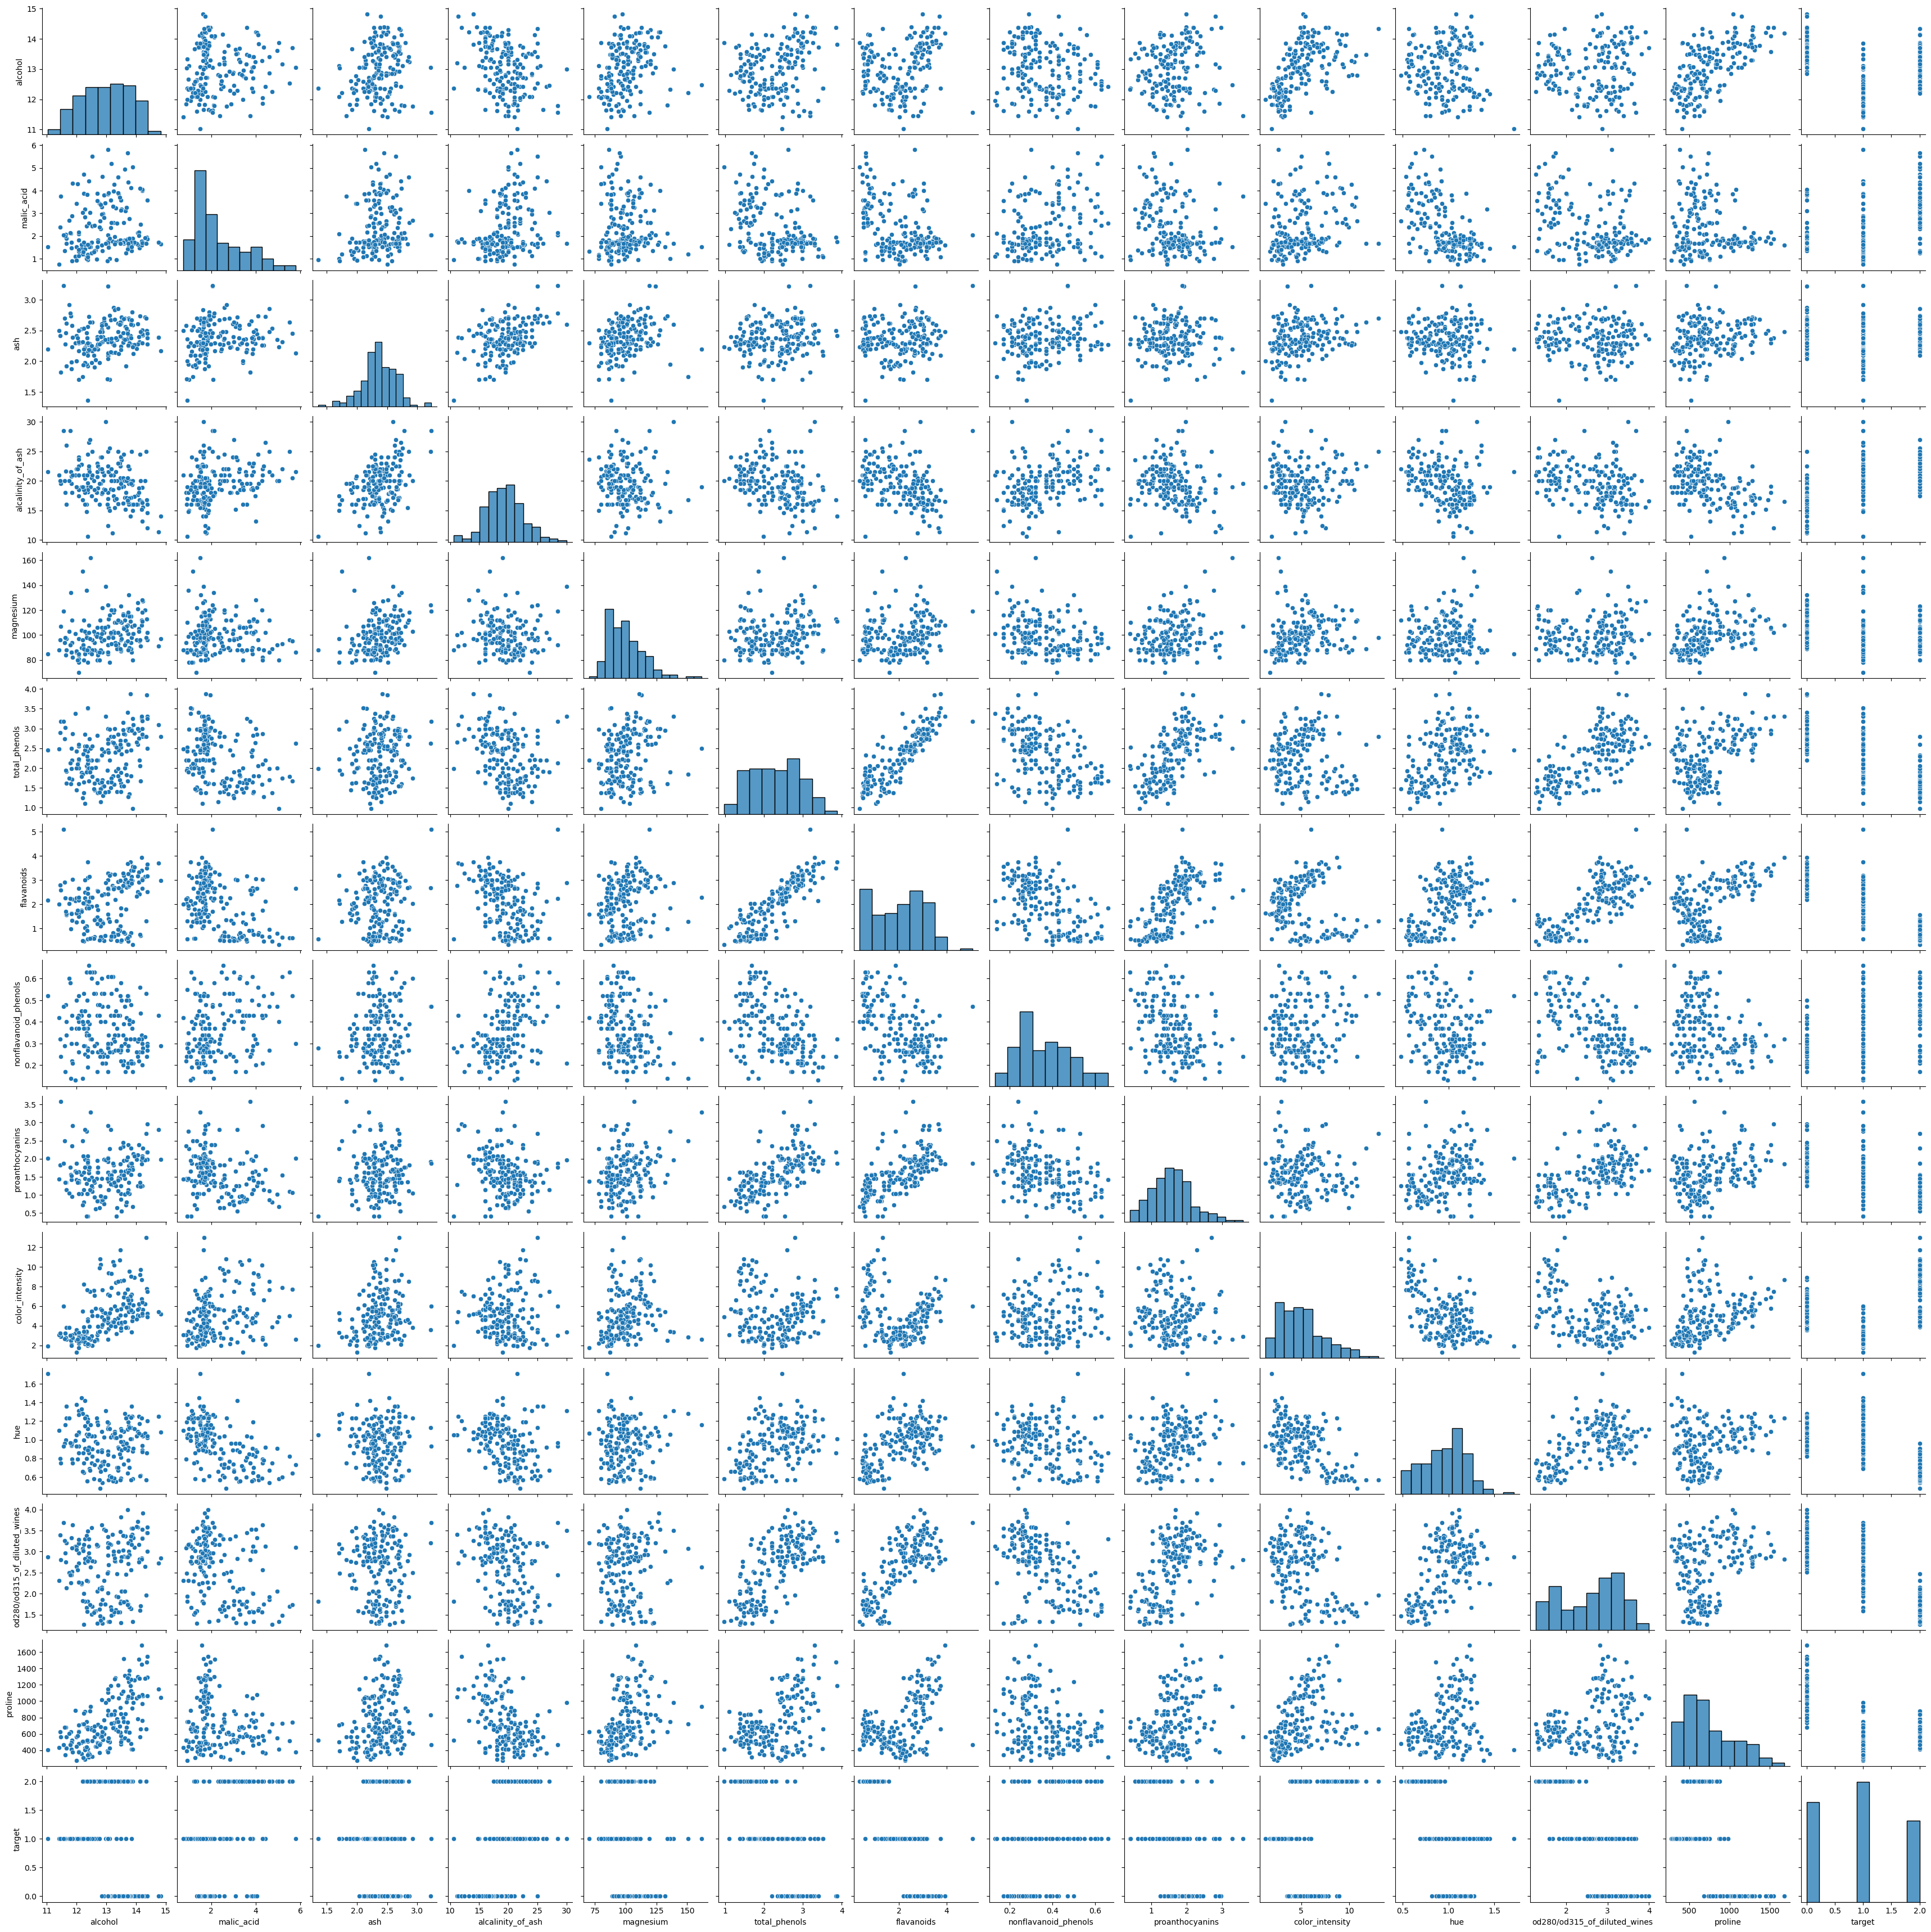

In [8]:
sns.pairplot(data=df)

> `Pairplot` shows marginal distribution of the data in each column, indicated by histogram along the diagonal. The scatter pairs the data distribution between two corresponding column. See this [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for further information of pairplot.
>
> **Double click** the plot to make it larger.
>
> Try the following code and see what changes!

```python
sns.pairplot(data=df, hue='target')

## Prepare dataset
Define predictor and target variables. Split dataset into train and test set. 

In [9]:
from sklearn.model_selection import train_test_split

X = wine.data # feature for predictor
y = wine.target # target to predict

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train the classifier model

We train three different classifer including [KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification), [Complement Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes), and [SVM](https://scikit-learn.org/stable/modules/svm.html#classification). 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cnb

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,norm,False


In [12]:
svm = SVC(random_state=42, probability=False, kernel='rbf', decision_function_shape='ovo', C=2)
svm.fit(X_train, y_train)
svm

,C,2
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


> For multi-class classification, it is common to use `ovo` in the `decision_function_shape` parameter. The `C` value refers to regularization parameter, preventing the risk of overfitting. See [here](https://scikit-learn.org/stable/modules/svm.html#multi-class-classification) for further explanation.

## 📊 Evaluate the model

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



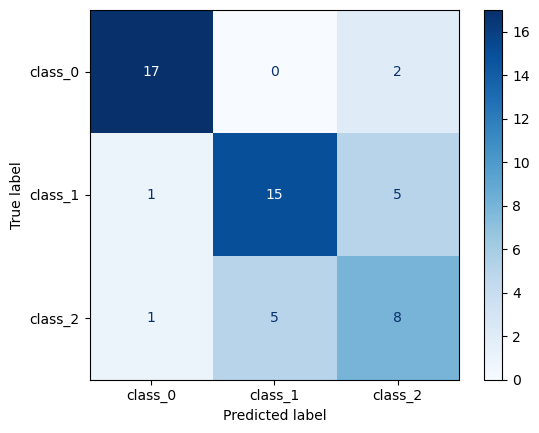

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, ConfusionMatrixDisplay

# predict using knn
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

ConfusionMatrixDisplay.from_estimator(knn, 
                                      X_test, 
                                      y_test, 
                                      display_labels=wine.target_names, 
                                      cmap=plt.cm.Blues)

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        19
           1       0.64      0.67      0.65        21
           2       1.00      0.21      0.35        14

    accuracy                           0.67        54
   macro avg       0.76      0.63      0.60        54
weighted avg       0.74      0.67      0.62        54



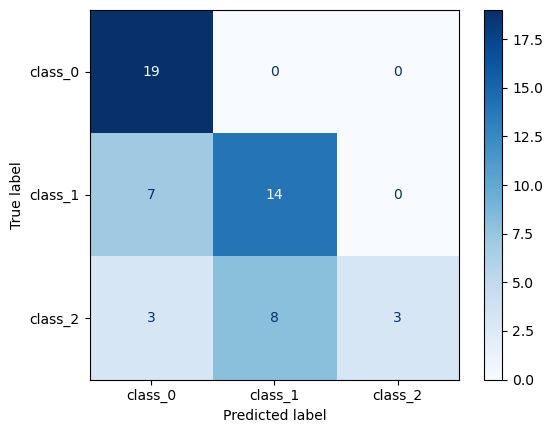

In [14]:
# predict using gnb
y_pred_cnb = cnb.predict(X_test)
print(classification_report(y_test,y_pred_cnb))

ConfusionMatrixDisplay.from_estimator(cnb, 
                                      X_test, 
                                      y_test, 
                                      display_labels=wine.target_names, 
                                      cmap=plt.cm.Blues)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.74      0.67      0.70        21
           2       0.56      0.64      0.60        14

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



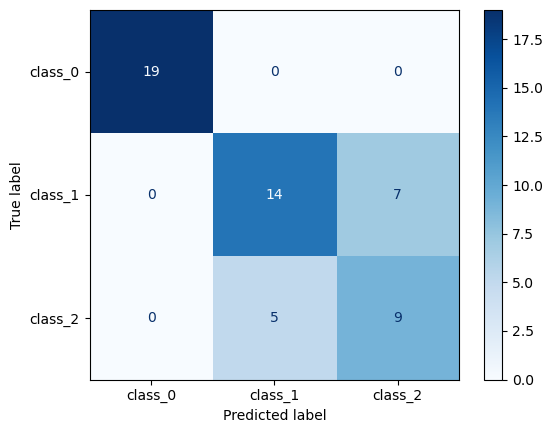

In [15]:
# predict using svm
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test,y_pred_svm))

ConfusionMatrixDisplay.from_estimator(svm, 
                                      X_test, 
                                      y_test, 
                                      display_labels=wine.target_names, 
                                      cmap=plt.cm.Blues)

## 🧠 Which one is better?

**KNN**

- Performs well on class 0, moderately on class 1, and poorly on class 2.
- Overall **accuracy** is 0.74.
- Likely struggles with class imbalance.
- Sensitive to the choice of $k$ and feature scaling.

**Complement Naive Bayes**

- Performs perfectly on class 2 and moderately similar on class 0 and 1.
- Possibly due to normally distributed features.
- Overall **accuracy** is 0.67, the poorest among the other models.

**Support Vector Machine (SVM)**

- Excellent on class 0, good performance on class 1, but poor on class 2.
- Overall **accuracy** is 0.78, the best model so far.
- Likely has trouble separating class 2 due to overlapping decision boundaries.
- May benefit from kernel tuning or class weighting.

---

<div class="alert alert-block alert-info">
<b>NOTE:</b> 
<p>Both KNN & SVM struggle to deal with class 2. Possibly due to class imbalance.</p>
<p>Complement NB is the underperformed model. This model is not generalize well to unseen data. </p>
</div>


## Resampling class for balancing

There are many techniques for resampling dataset. We will use [SMOTE](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html) - 'Synthetic Minority Over-sampling Technique' to balance the dataset. 

Resampling will be performed only on **train** set, thus the proportion of class in the **test** set is maintained.

First, make sure that the package is already installed by running the following code.

In [16]:
!pip show imbalanced-learn

> Run this code if it is not installed yet.

In [17]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


In [18]:
from imblearn.over_sampling import SMOTE

resample = SMOTE()
X_train_resampled, y_train_resampled = resample.fit_resample(X_train, y_train)

### Check the class proportion

In [19]:
print('Total initial sample:', len(X_train))
# check the target class proportion
y_train.value_counts()

Total initial sample: 124


target
1    50
0    40
2    34
Name: count, dtype: int64

In [20]:
print('Total sample after resampling:', len(X_train_resampled))
y_train_resampled.value_counts()

Total sample after resampling: 150


target
2    50
1    50
0    50
Name: count, dtype: int64

> As we can see that before resampling the dataset contains **124** samples with **different** `count` on each target class.
>
> After resampling, we see that the proportion on each class is now balanced, **50 sample each class**, with new total sample of **150** records.

## 🔍 Retrain the model
Let's train the model with new resampled dataset.

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      0.71      0.77        21
           2       0.56      0.71      0.62        14

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.80      0.78      0.78        54



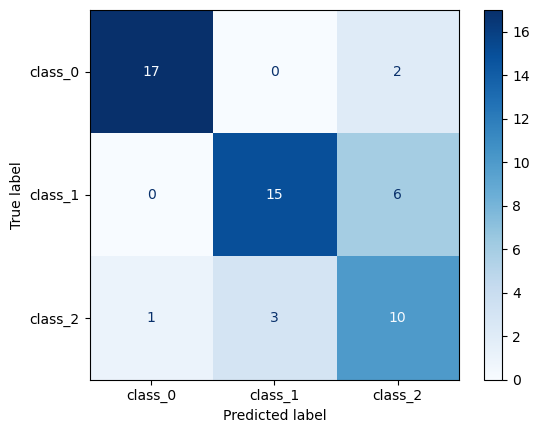

In [21]:
knn_resampled = KNeighborsClassifier(n_neighbors=5)
knn_resampled.fit(X_train_resampled, y_train_resampled)

# predict using knn
y_pred_knn_resampled = knn_resampled.predict(X_test)
print(classification_report(y_test, y_pred_knn_resampled))

ConfusionMatrixDisplay.from_estimator(knn_resampled, 
                                      X_test, 
                                      y_test, 
                                      display_labels=wine.target_names, 
                                      cmap=plt.cm.Blues)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        19
           1       0.78      0.67      0.72        21
           2       1.00      0.57      0.73        14

    accuracy                           0.76        54
   macro avg       0.82      0.75      0.75        54
weighted avg       0.80      0.76      0.75        54



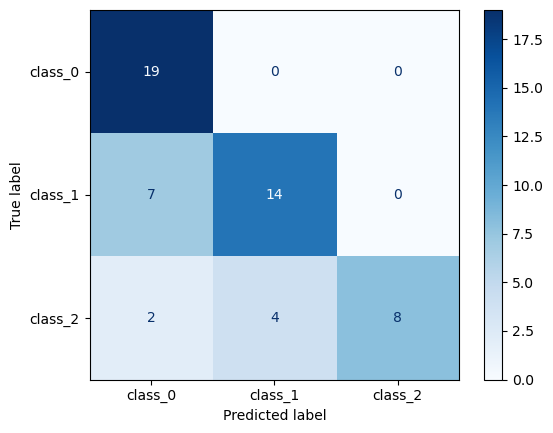

In [22]:
cnb_resampled = ComplementNB()
cnb_resampled.fit(X_train_resampled, y_train_resampled)

# predict using knn
y_pred_cnb_resampled = cnb_resampled.predict(X_test)
print(classification_report(y_test, y_pred_cnb_resampled))

ConfusionMatrixDisplay.from_estimator(cnb_resampled, 
                                      X_test, 
                                      y_test, 
                                      display_labels=wine.target_names, 
                                      cmap=plt.cm.Blues)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.81      0.62      0.70        21
           2       0.58      0.79      0.67        14

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.79        54
weighted avg       0.82      0.80      0.80        54



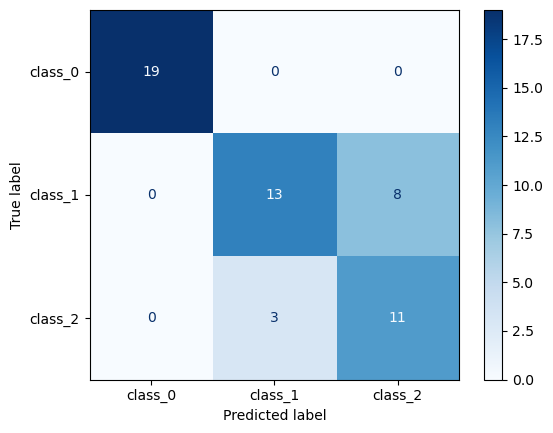

In [23]:
svm_resampled = SVC(random_state=42, decision_function_shape='ovo', C=2,
                    probability=False, kernel='rbf')
svm_resampled.fit(X_train_resampled, y_train_resampled)

# predict using knn
y_pred_svm_resampled = svm_resampled.predict(X_test)
print(classification_report(y_test, y_pred_svm_resampled))

ConfusionMatrixDisplay.from_estimator(svm_resampled, 
                                      X_test, 
                                      y_test, 
                                      display_labels=wine.target_names, 
                                      cmap=plt.cm.Blues)

> As we can see that the performance of all models are improved after balancing the sample.
>
> The accuracy of each model:
> - **KNN**: 0.74 → 0.76
> - **CNB**: 0.67 → 0.78 (highest improvement - 16%)
> - **SVM**: 0.78 → 0.80 (still the best performing model)
>
> You might obtain **different** accuracy scores. This is because the randomness nature during the resampling process. If you want to maintain the random state, you may pass it in the `SMOTE` as follows

```python
resample = SMOTE(random_state = 42)
```